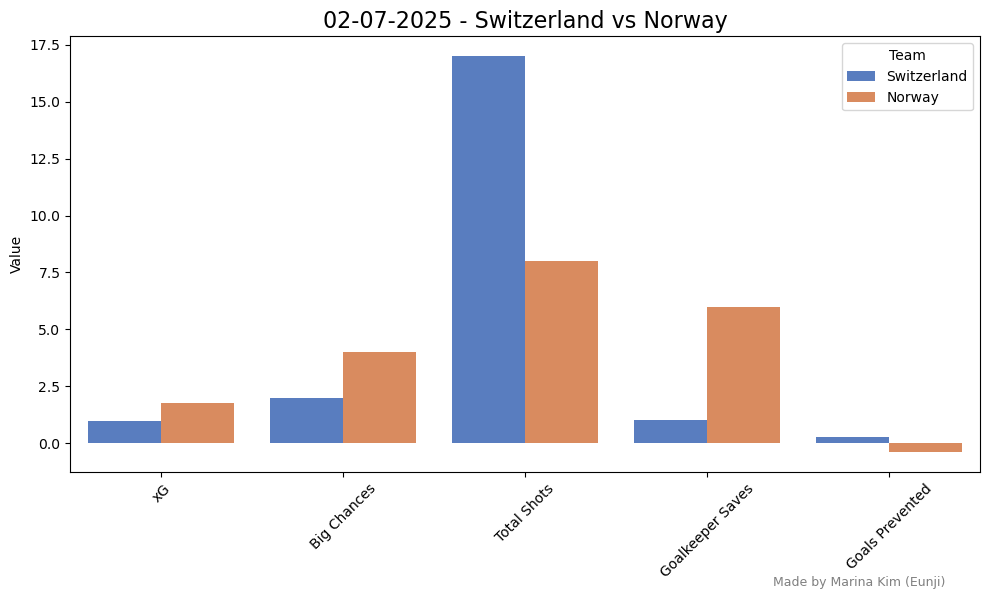

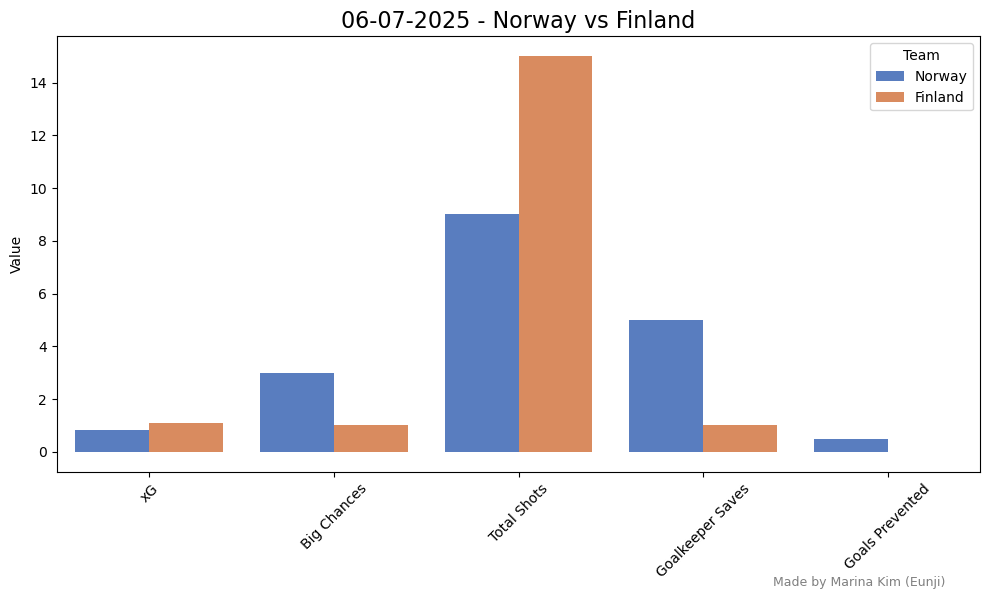

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# csv ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ 
df = pd.read_csv('round1.csv')

# ÎÖ∏Î•¥Ïõ®Ïù¥Í∞Ä ÌôàÌåÄ ÎòêÎäî Ïñ¥Ïõ®Ïù¥ÌåÄÏù∏ Í≤ΩÍ∏∞Îßå ÌïÑÌÑ∞ÎßÅ
norway_games = df[(df['HomeTeam'] == 'Norway') | (df['AwayTeam'] == 'Norway')]

# ÎÖ∏Î•¥Ïõ®Ïù¥ Í≤ΩÍ∏∞ Ï§ë 2Í≤ΩÍ∏∞Îßå Ï∂îÏ∂ú (ÌïÑÏöîÏãú ÎÇ†Ïßú Ïàú Ï†ïÎ†¨ ÌõÑ 2Í≤ΩÍ∏∞)
norway_games = norway_games.sort_values('Date').head(2)

def prepare_plot_data(df_row):
    home = df_row['HomeTeam']
    away = df_row['AwayTeam']
    
    stats = ['xG', 'Big Chances', 'Total Shots', 'Goalkeeper Saves', 'Goals Prevented']
    
    home_values = [
        df_row['HomexG'],
        df_row['HomeBigChances'],
        df_row['HomeShots'],
        df_row['HomeSaves'],
        df_row['HGP']
    ]
    
    away_values = [
        df_row['AwayxG'],
        df_row['AwayBigChances'],
        df_row['AwayShots'],
        df_row['AwaySaves'],
        df_row['AGP']
    ]
    
    plot_data = pd.DataFrame({
        'Stat': stats * 2,
        'Team': [home]*len(stats) + [away]*len(stats),
        'Value': home_values + away_values
    })
    
    title = f"{df_row['Date']} - {home} vs {away}"
    return plot_data, title

def plot_match_stats(df_plot, title, filename):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=df_plot, x='Stat', y='Value', hue='Team', palette='muted', ax=ax)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Team')

    # ‚úÖ ÌïòÎã® Ïò§Î•∏Ï™Ω ÌÅ¨Î†àÎîß
    fig.text(0.95, 0.01, 'Made by Marina Kim (Eunji)',
             ha='right', va='bottom', fontsize=9, color='gray')

    fig.tight_layout()

    # ‚úÖ Ï†ÄÏû•
    fig.savefig(filename, dpi=300, bbox_inches='tight')
  # üí° Ïù¥Í±∞ Ï∂îÍ∞ÄÌïòÎ©¥ Î©îÎ™®Î¶¨ ÎàÑÏàòÏôÄ ÎçÆÏñ¥Ïì∞Í∏∞ Î∞©ÏßÄÎê®
    plt.show()

# 1Í≤ΩÍ∏∞
plot_data1, title1 = prepare_plot_data(norway_games.iloc[0])
plot_match_stats(plot_data1, title1, 'norway_match1.png')

# 2Í≤ΩÍ∏∞
plot_data2, title2 = prepare_plot_data(norway_games.iloc[1])
plot_match_stats(plot_data2, title2, 'norway_match2.png')
